# CO2 Emission Case Study

### **Problem statement:**

The Global Automotive Council aims to understand the key factors influencing vehicle CO₂ emissions and explore data-driven strategies for emission reduction.
A dataset containing detailed information on vehicle specifications, engine characteristics, fuel types, and emission levels has been provided.

The objective is to analyze this dataset to uncover hidden patterns, identify the major contributors to CO₂ emissions, and develop predictive models to support policy and design decisions in the automotive sector.

#### **1. Begin by familiarizing yourself with the dataset. Identify what kind of information is captured about vehicles and how these variables might influence CO₂ emissions.**

#### **2. Examine the dataset for any inconsistencies, missing entries, or data quality issues. Consider what preprocessing steps may be necessary to make the dataset ready for meaningful analysis.**

In [7]:
import pandas as pd

dataset_url = 'https://docs.google.com/spreadsheets/d/1__MwDkhPLACGGG6qxH-UEjn0u_Pkktk4GvKeXlyXluI/export?format=csv&usp=sharing'

emissions_orig = pd.read_csv(dataset_url)

# Check for missing values
print("Missing values per column:")
print(emissions_orig.isnull().sum())

# Get dataset information (data types, non-null values, etc.)
print("\nDataset Info:")
emissions_orig.info()

Missing values per column:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4  

In [8]:
emissions = emissions_orig.drop('Fuel Consumption Comb (mpg)', axis=1)

emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


***
***

####
3. **Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence on emission levels? Use suitable methods to support your reasoning.**
4. **Create visual summaries that reveal how emission levels change with respect to different numerical variables in the dataset. Focus on uncovering patterns or trends that might not be immediately visible.**
5. **Compare emission levels across different vehicle types or fuel categories. Identify any clear distinctions or surprising findings that emerge.**

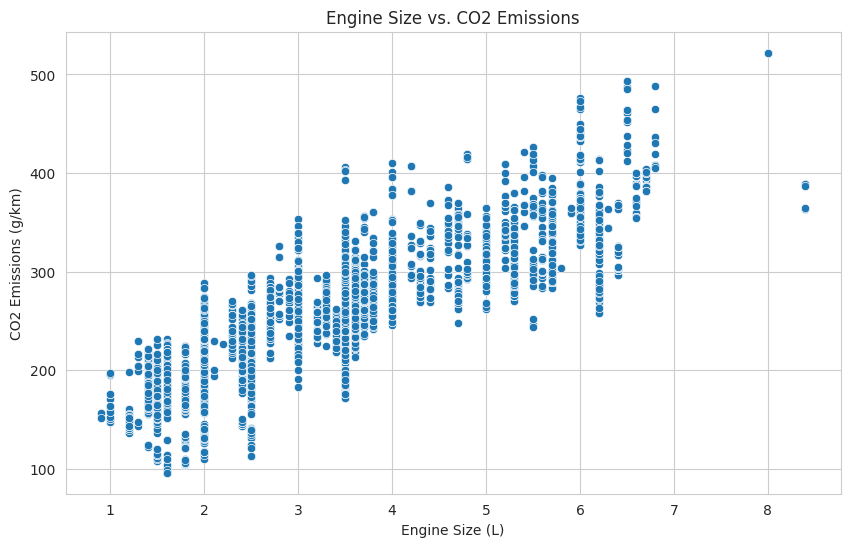

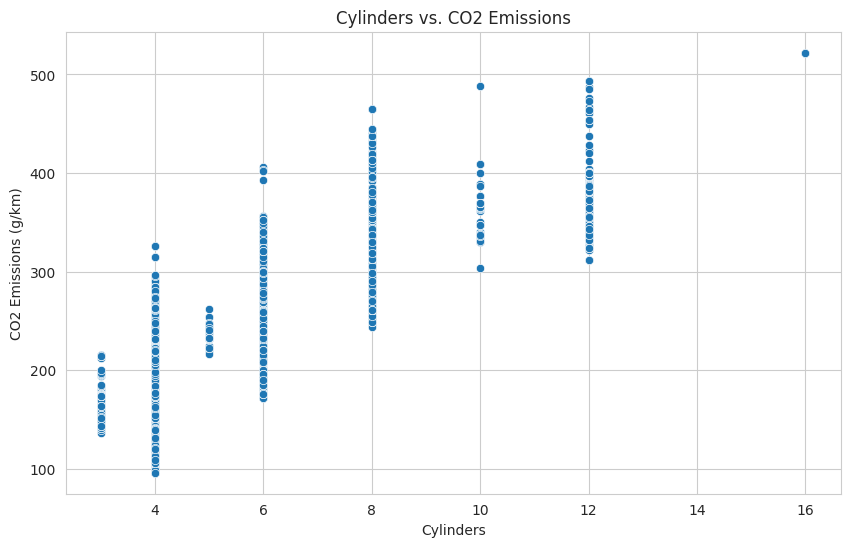

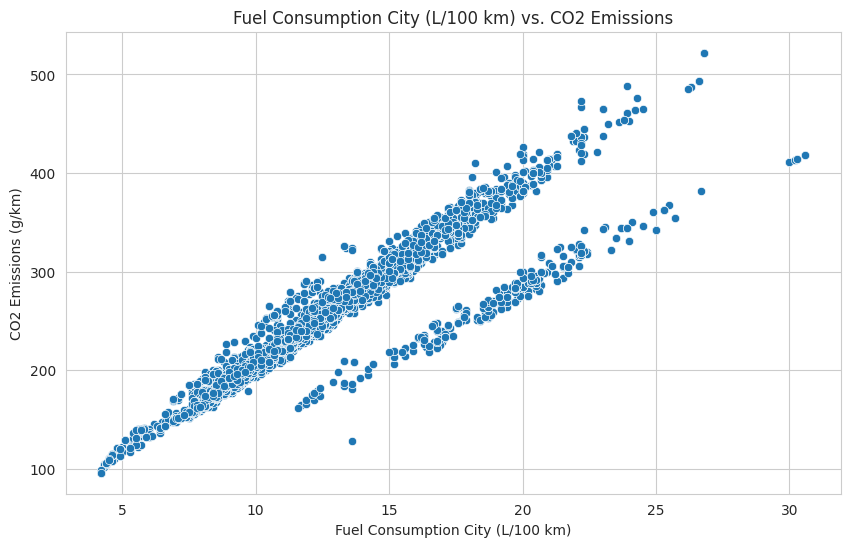

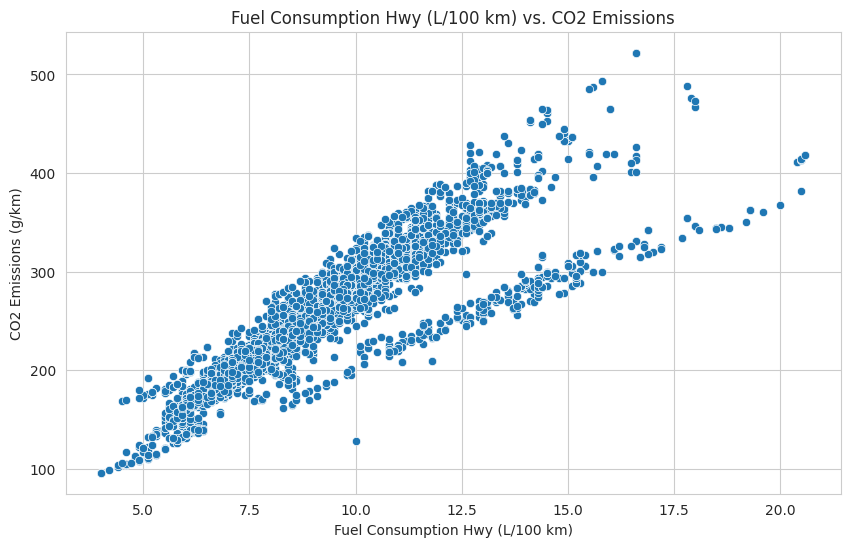

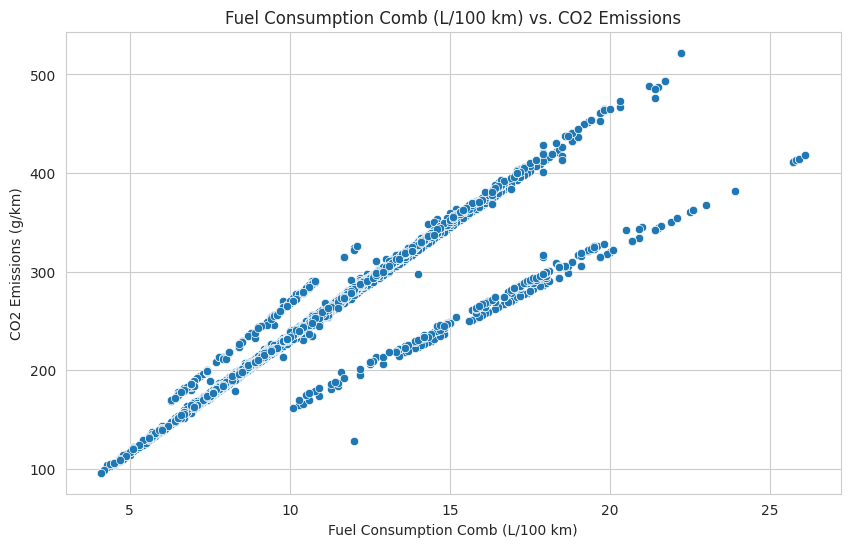

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Scatter plot for Engine Size vs. CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=emissions, x='Engine Size(L)', y='CO2 Emissions(g/km)')
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

print('\n\n')

# 2. Scatter plot for Cylinders vs. CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=emissions, x='Cylinders', y='CO2 Emissions(g/km)')
plt.title('Cylinders vs. CO2 Emissions')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

print('\n\n')

# 3. Scatter plots for Fuel Consumption vs. CO2 Emissions
fuel_consumption_cols = [
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
]

for col in fuel_consumption_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=emissions, x=col, y='CO2 Emissions(g/km)')
    plt.title(f'{col} vs. CO2 Emissions')
    plt.xlabel(col)
    plt.ylabel('CO2 Emissions (g/km)')
    plt.show()
    print('\n\n')

In [10]:
# Select numerical columns relevant to CO2 Emissions
numerical_cols = [
    'Engine Size(L)',
    'Cylinders',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
    'CO2 Emissions(g/km)'
]

# Calculate the correlation matrix
correlation_matrix = emissions[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,0.918052
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,1.000000


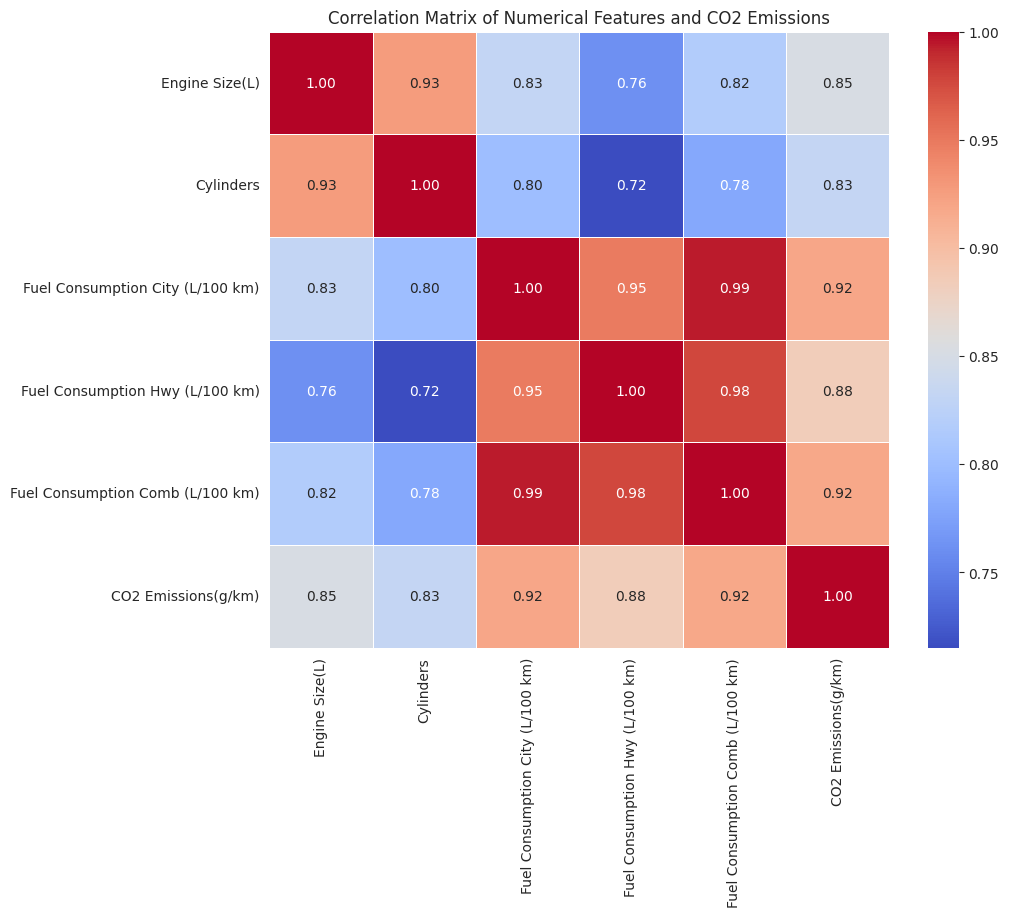

In [11]:
# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and CO2 Emissions')
plt.show()

## Examine categorical features
Select the categorical columns and visualize the relationship between each categorical column and 'CO2 Emissions(g/km)'. Given the large number of unique values in 'Make' and 'Model', bar plots of the mean CO2 emissions will be more suitable than box plots to avoid clutter. For 'Vehicle Class', 'Transmission', and 'Fuel Type', box plots can be used to show the distribution of CO2 emissions across categories, as these columns have fewer unique values.



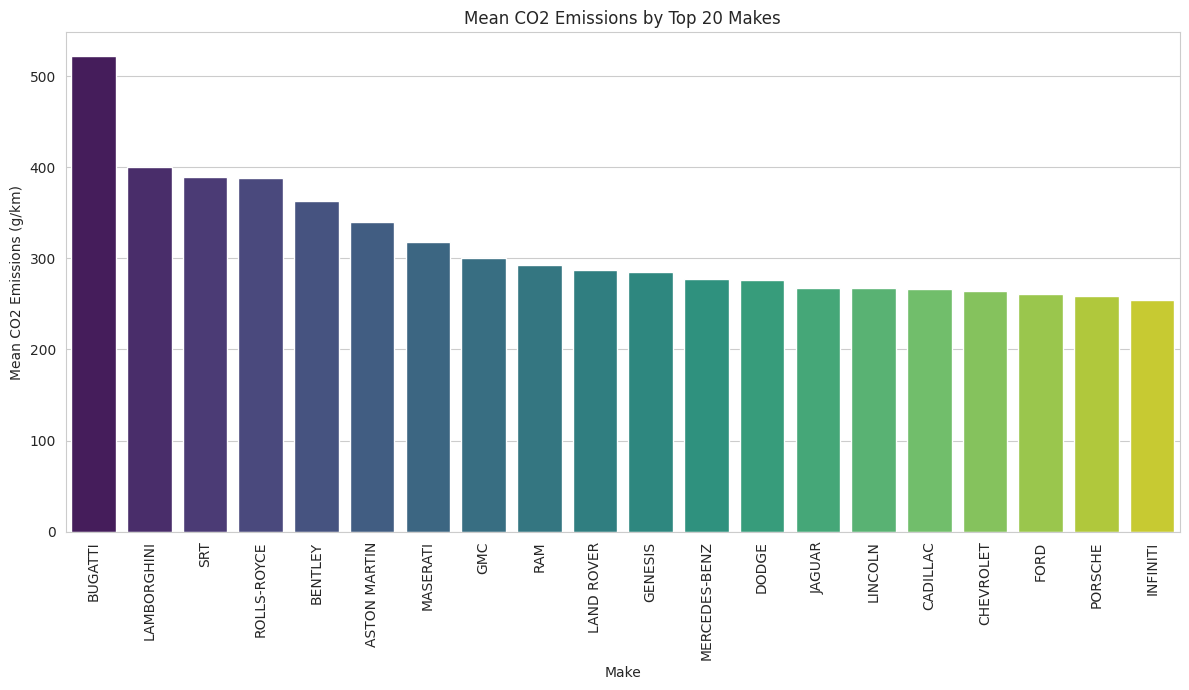

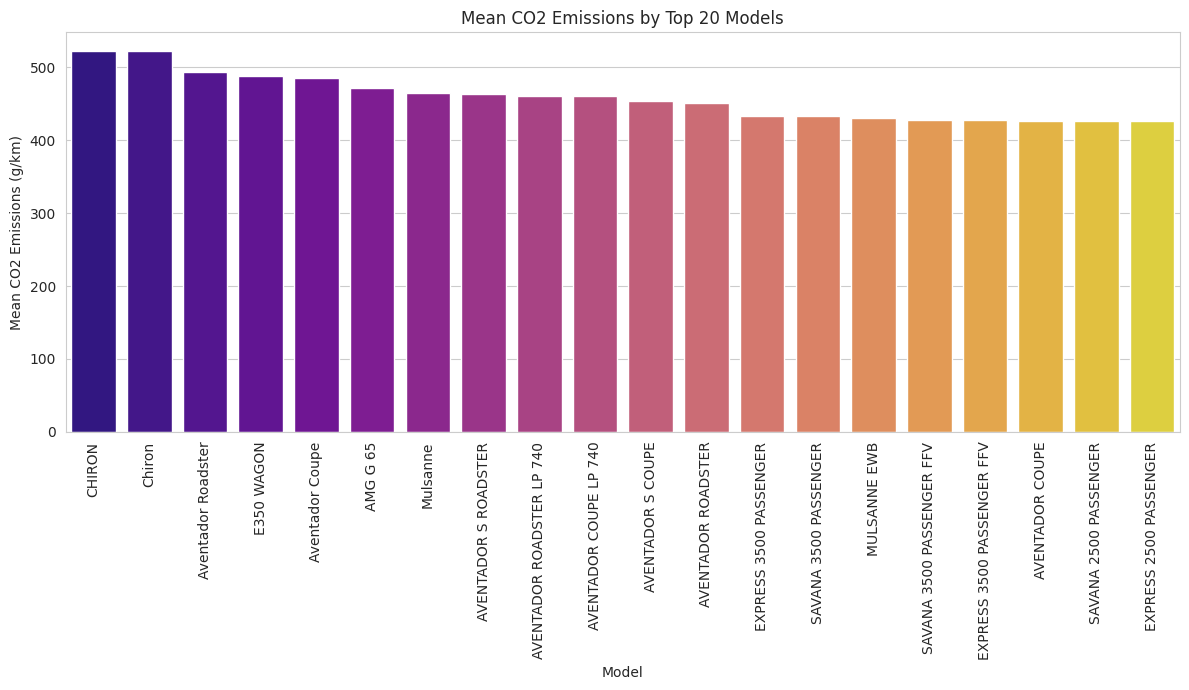

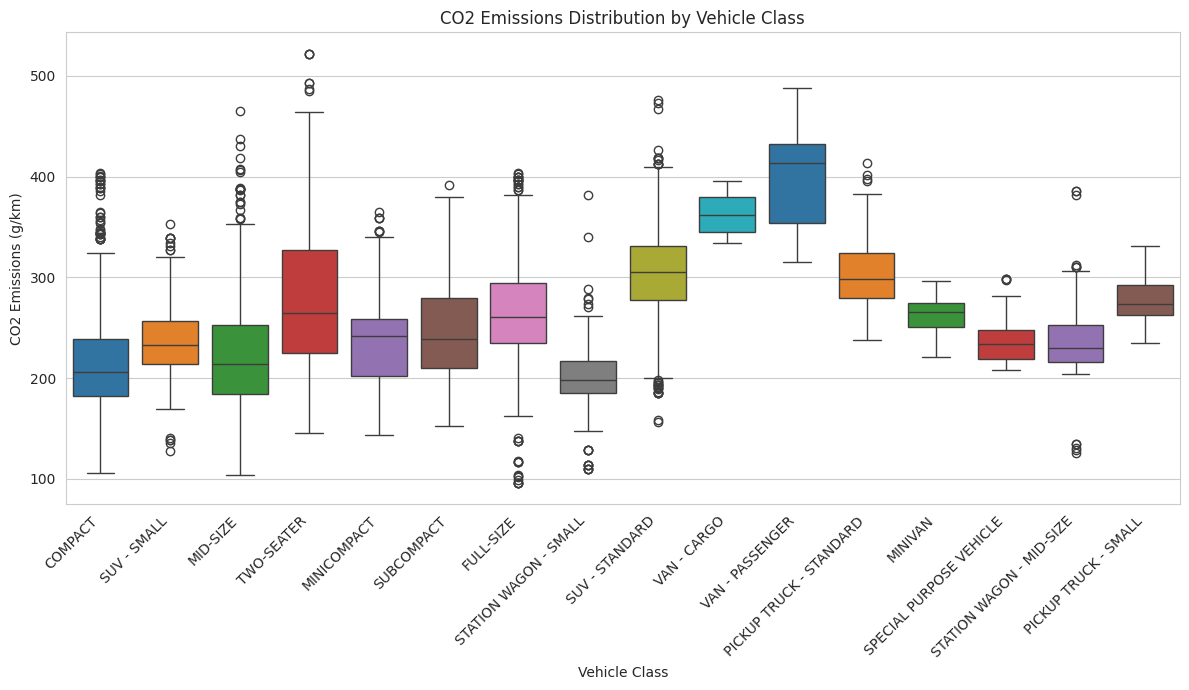

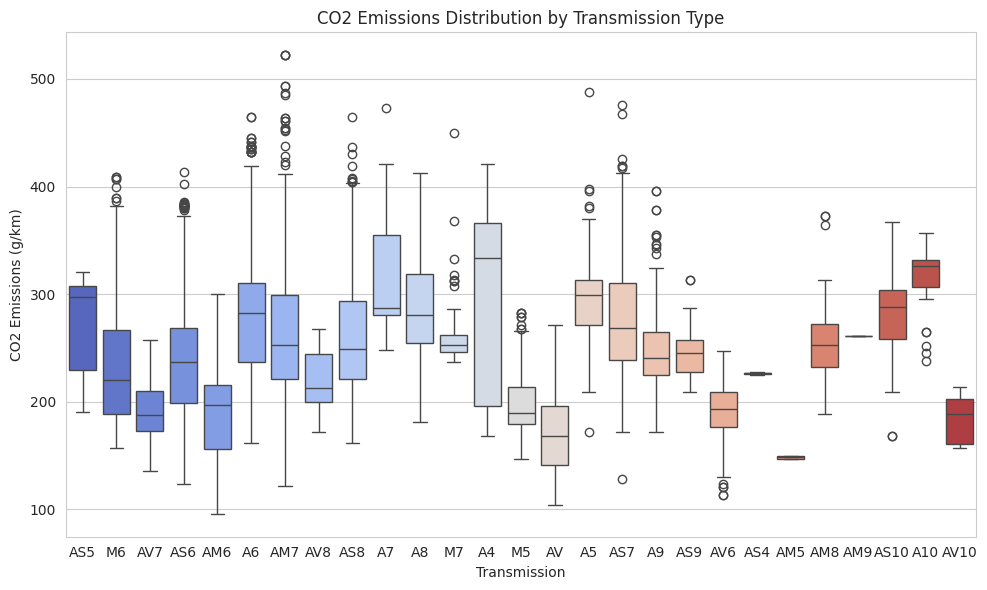

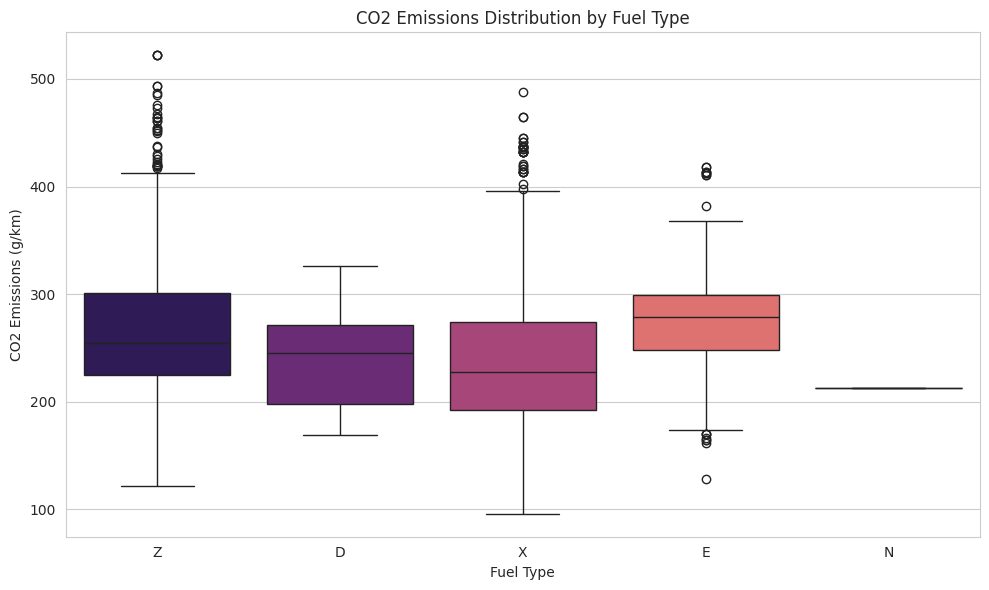

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Analyze and visualize the relationship between categorical features and CO2 Emissions

# For 'Make' (many unique values), visualize the mean CO2 Emissions for the top 20 makes
top_makes = emissions.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_makes.index, y=top_makes.values, hue=top_makes.index, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Mean CO2 Emissions by Top 20 Makes')
plt.xlabel('Make')
plt.ylabel('Mean CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

print('\n\n')

# For 'Model' (many unique values), visualize the mean CO2 Emissions for the top 20 models
top_models = emissions.groupby('Model')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_models.index, y=top_models.values, hue=top_models.index, palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Mean CO2 Emissions by Top 20 Models')
plt.xlabel('Model')
plt.ylabel('Mean CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

print('\n\n')

# For 'Vehicle Class', visualize the distribution of CO2 Emissions using box plots
plt.figure(figsize=(12, 7))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', hue='Vehicle Class', data=emissions, palette='tab10')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions Distribution by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

print('\n\n')

# For 'Transmission', visualize the distribution of CO2 Emissions using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', hue='Transmission', data=emissions, palette='coolwarm')
plt.title('CO2 Emissions Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

print('\n\n')

# For 'Fuel Type', visualize the distribution of CO2 Emissions using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', hue='Fuel Type', data=emissions, palette='magma')
plt.title('CO2 Emissions Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Fuel consumption metrics (Combined L/100 km, City L/100 km and Highway L/100 km) show the strongest linear relationships with CO₂ Emissions, with correlation coefficients of approximately 0.99, 0.92, 0.88, and -0.91 respectively.
*   Engine Size and Cylinders also exhibit strong positive linear relationships with CO₂ Emissions, with correlation coefficients around 0.85 and 0.83, respectively.
*   Categorical features including Vehicle Class, Transmission type, and Fuel Type show significant differences in the distribution and mean of CO₂ emissions across their respective categories.
* Some classes (e.g., SUVs, Pickups) tend to have higher emissions than others (e.g., Compact, Subcompact). This indicates that vehicle class has a significant influence.
*   Vehicle Make and Model are influential attributes, as evidenced by significant variations in average CO₂ emissions among different manufacturers and models, indicating they encapsulate a combination of underlying factors affecting emissions.

### Insights or Next Steps

*   The strong correlations suggest that models aiming to predict CO₂ emissions should heavily weight fuel consumption, engine size, and cylinder count.
*   Further analysis could involve building a predictive model using the identified influential features to estimate CO₂ emissions for new vehicle configurations.



***
***

#### **6. Observe if there are any vehicles that produce unusually high or low emissions compared to others with similar characteristics. Reflect on what could explain such deviations.**

In [38]:
# Identify vehicles with unusually high emissions for their fuel type (e.g., significantly above the mean for that fuel type)
# Calculate the mean CO2 emissions for each fuel type
mean_emissions_by_fuel = emissions.groupby('Fuel Type')['CO2 Emissions(g/km)'].transform('mean')

# Define a threshold for high emissions (e.g., 1.5 times the mean for the fuel type)
emissions['High_Emission_Outlier'] = emissions['CO2 Emissions(g/km)'] > (mean_emissions_by_fuel * 1.5)

# Filter for high emission outliers
high_emission_outliers = emissions[emissions['High_Emission_Outlier']]

print("Vehicles with unusually high emissions:")
display(high_emission_outliers[['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Fuel Type', 'CO2 Emissions(g/km)']].head())

# Identify vehicles with unusually low emissions for their fuel type (e.g., significantly below the mean for that fuel type)
# Define a threshold for low emissions (e.g., 0.5 times the mean for the fuel type, considering that emissions cannot be negative)
emissions['Low_Emission_Outlier'] = emissions['CO2 Emissions(g/km)'] < (mean_emissions_by_fuel * 0.5)

# Filter for low emission outliers
low_emission_outliers = emissions[emissions['Low_Emission_Outlier']]

print("\nVehicles with unusually low emissions:")
display(low_emission_outliers[['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Fuel Type', 'CO2 Emissions(g/km)']].head())

Vehicles with unusually high emissions:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,CO2 Emissions(g/km)
46,AUDI,R8,TWO-SEATER,4.2,8,Z,407
48,AUDI,R8,TWO-SEATER,5.2,10,Z,409
50,AUDI,R8 SPYDER,TWO-SEATER,4.2,8,Z,407
52,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,Z,409
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,Z,437



Vehicles with unusually low emissions:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,CO2 Emissions(g/km)
487,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,X,110
992,TOYOTA,PRIUS,MID-SIZE,1.8,4,X,110
993,TOYOTA,PRIUS c,COMPACT,1.5,4,X,108
1047,VOLKSWAGEN,JETTA TURBO HYBRID,COMPACT,1.4,4,Z,124
1569,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,X,115


In [70]:
print("Low emission outliers by fuel type")
display(low_emission_outliers.groupby('Fuel Type').size().reset_index(name='Count'))
print("\n\nHigh emission outliers by fuel type")
display(high_emission_outliers.groupby('Fuel Type').size().reset_index(name='Count'))

Low emission outliers by fuel type


,Fuel Type,Count
0,E,1
1,X,41
2,Z,3




High emission outliers by fuel type


,Fuel Type,Count
0,E,6
1,X,94
2,Z,65


In [74]:
print('Vehicle classes of high emission outliers using Premium Gasoline as fuel')
display(high_emission_outliers[high_emission_outliers['Fuel Type'] == 'Z'].groupby('Vehicle Class').size().reset_index(name='Count'))

print('\n\nVehicle classes of low emission outliers using Gasoline as fuel')
display(low_emission_outliers[low_emission_outliers['Fuel Type'] == 'X'].groupby('Vehicle Class').size().reset_index(name='Count'))

Vehicle classes of high emission outliers using Premium Gasoline as fuel


,Vehicle Class,Count
0,COMPACT,5
1,FULL-SIZE,6
2,MID-SIZE,7
3,SUV - STANDARD,17
4,TWO-SEATER,30




Vehicle classes of low emission outliers using Gasoline as fuel


,Vehicle Class,Count
0,COMPACT,4
1,FULL-SIZE,11
2,MID-SIZE,18
3,STATION WAGON - SMALL,8


## Observations & Reflections

### Emission outliers by fuel type:
* Vehicles using premium gasoline (Z) as fuel are barely found in the list of low emission outliers
* Mostly, vehicles using regular gasoline (X) are found in this list, but they are also found in large numbers in the list of high emission outliers.
* On the other hand, both the above fuel types (X & Z) are prominently seen in the high emissions outliers list while those with Ethanol (E) as fuel have a very low presence in this list as they are much more fuel efficient, thus producing less CO2 emissions.

### Emission outliers by vehicle class:
* Generally, standard SUVs and two-seater cars have higher than usual emissions owing to their weight (in case of SUVs) and engines optimised for speed rather than fuel efficiency (in case of sports/race cars that are usually two seaters).
* On the contrary, low emission outliers are usually smaller cars as seen in the table above.

### Potential explanations for deviations:

Vehicles with unusually high or low emissions compared to others with similar characteristics could be influenced by several factors beyond the primary attributes we've analyzed. These might include:

*   **Specific Engine Technologies:** Variations in engine design, turbocharging, or fuel injection systems can significantly impact efficiency and emissions.
*   **Vehicle Weight and Aerodynamics:** Heavier vehicles or those with less aerodynamic designs generally require more energy to move, leading to higher emissions. Conversely, lighter and more aerodynamic vehicles can be more fuel-efficient.
*   **Transmission Type and Gearing:** The type of transmission (manual, automatic, CVT) and its gearing can affect engine load and efficiency, influencing emissions.
*   **Tire Type and Pressure:** Tire rolling resistance can impact fuel consumption and emissions.
*   **Driving Cycle and Testing Procedures:** While the data is likely based on standardized testing, slight variations in testing or specific driving conditions could contribute to deviations.
*   **Hybrid or Electric Powertrains (if applicable):** Vehicles with hybrid systems or electric components will have significantly different emission profiles compared to purely internal combustion engine vehicles, even within the same general vehicle class.
*   **After-treatment Systems:** The presence and efficiency of catalytic converters and other emission control systems play a crucial role in reducing harmful emissions.
*   **Manufacturing Variations:** Even within the same make and model, minor manufacturing differences could lead to slight variations in performance and emissions.
*   **Data Errors:** Although we checked for missing values, there could still be errors in data entry or measurement that result in seemingly unusual emission figures.

Examining the specific characteristics of the identified outlier vehicles (e.g., their exact engine specifications, weight, and transmission) would be necessary to pinpoint the most likely reasons for their unusual emission levels.

***
***

#### **7. Prepare the dataset for model building by ensuring that numerical and categorical features are appropriately represented. Consider any transformations or encodings that may improve interpretability.**

In [83]:
# Prepare the dataset for model building

# Separate features (X) and target variable (y)
X = emissions.drop('CO2 Emissions(g/km)', axis=1)
y = emissions['CO2 Emissions(g/km)']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the first few rows of the processed data
print("Processed data (first 5 rows):")
display(X.head())

# Display the columns of the processed data to see the new encoded features
print("\nProcessed data columns:")
print(X.columns)

Processed data (first 5 rows):


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),High_Emission_Outlier,Low_Emission_Outlier,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True



Processed data columns:
Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'High_Emission_Outlier', 'Low_Emission_Outlier', 'Make_ALFA ROMEO',
       'Make_ASTON MARTIN', 'Make_AUDI',
       ...
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object', length=2140)


***
***

#### **8. Develop a simple, interpretable model to estimate CO₂ emissions using relevant features from the dataset. Summarize how the model captures the relationship between vehicle characteristics and emissions.**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 38.93
Root Mean Squared Error (RMSE): 6.24
R-squared (R2): 0.99


In [85]:
# Display the model coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Sort coefficients by their absolute value to see the most influential features
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nModel Coefficients (sorted by absolute value):")
display(coefficients.head(20)) # Display top 20 most influential features


Model Coefficients (sorted by absolute value):


,Feature,Coefficient,Abs_Coefficient
2136,Fuel Type_E,-127.546856,127.546856
859,Model_EXPRESS 3500 PASSENGER FFV,-41.145951,41.145951
1678,Model_SAVANA 3500 PASSENGER FFV,-40.963112,40.963112
2138,Fuel Type_X,-27.948489,27.948489
2139,Fuel Type_Z,-24.770459,24.770459
1800,Model_T-150 Wagon,23.350286,23.350286
1005,Model_GL 350 BLUETEC 4MATIC,20.358912,20.358912
561,Model_CLS 450 4MATIC,-19.428003,19.428003
798,Model_E150 WAGON FFV,-19.308024,19.308024
835,Model_ESCALADE AWD,-19.171689,19.171689


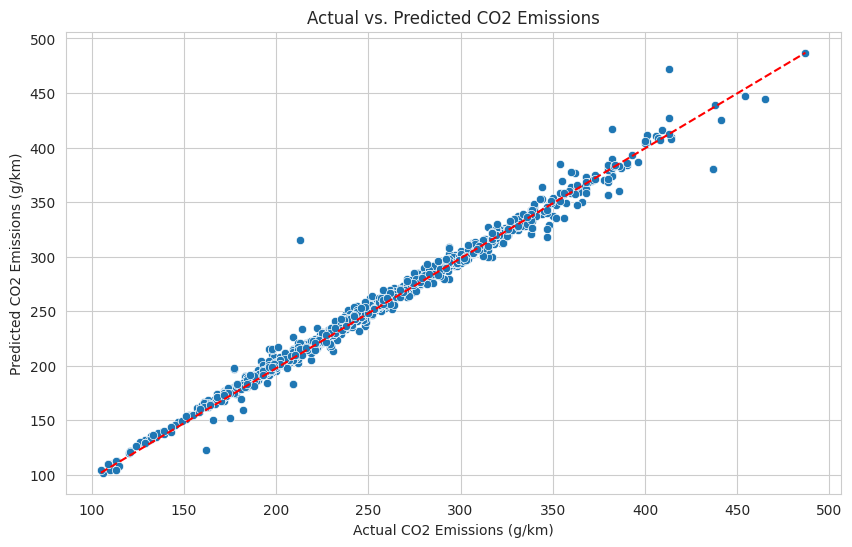

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted CO2 emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--') # Add a diagonal line
plt.show()

#### Summary of Model Findings:

* The linear regression model achieved a high R-squared value (0.99), indicating that it explains a large proportion of the variance in CO2 emissions.
The coefficients show the impact of each feature on CO2 emissions. Features with larger absolute coefficients have a greater influence.
* Looking at the top coefficients, it's clear that fuel type has a very significant impact on emissions, as indicated by the large coefficients for 'Fuel Type_E' (Ethanol), 'Fuel Type_X' (Gasoline) , and 'Fuel Type_Z' (Premium Gasoline). The negative coefficients for these fuel types suggest that compared to the baseline (which is determined by the one-hot encoding and the dropped category), these fuel types are associated with lower emissions.
* However, Gasoline & Premium Gasoline fuels are also commonly found in the high emissions outliers list. But largely these fuel types make it possible to have lower emissions in a vehicle.
* Specific models also appear in the top coefficients, indicating that beyond general vehicle characteristics, the specific make and model can have a notable influence on emissions, likely capturing the combined effect of various design and engineering choices.
* While not in the very top 20 coefficients displayed, the numerical features like 'Engine Size(L)', 'Cylinders', and 'Fuel Consumption Comb (L/100 km)' are also expected to have significant positive coefficients, reflecting their strong positive correlation with CO2 emissions observed earlier in the analysis.

**The scatter plot shows that the predicted values are very close to the actual values, which is consistent with the high R-squared value we observed earlier. The points cluster closely around the red diagonal line, indicating that the model is performing well in predicting CO₂ emissions.**

***
***

#### **9. Assess how well the model performs in estimating emissions. Reflect on the meaning of the performance metrics and what they indicate about model reliability.**

* **Mean Squared Error (MSE):** The MSE is 38.93. This metric represents the average squared difference between the actual and predicted CO₂ emission values. A lower MSE indicates better model performance. The value of 38.93 means that, on average, the squared difference between the model's predictions and the actual emissions is around 38.93.
* **Root Mean Squared Error (RMSE):** The RMSE is 6.24. This is the square root of the MSE and is in the same units as the target variable (g/km). The RMSE provides a measure of the typical error in the predictions. An RMSE of 6.24 g/km suggests that, on average, the model's predictions are off by about 6.24 grams of CO₂ per kilometer. Considering the range of CO₂ emissions in the dataset, an RMSE of 6.24 indicates a relatively low error.
* **R-squared (R2):** The R-squared value is 0.99. This metric represents the proportion of the variance in the dependent variable (CO₂ emissions) that is predictable from the independent variables (vehicle characteristics). An R-squared of 0.99 means that approximately 99% of the variation in CO₂ emissions can be explained by the features included in the model. This is a very high R-squared value, suggesting that the model fits the data exceptionally well.

**What these metrics indicate about model reliability:**

* The combination of a relatively low RMSE and a very high R-squared value indicates that the linear regression model is performing very well in estimating CO₂ emissions based on the provided features.

* The low RMSE suggests that the model's predictions are, on average, quite close to the actual emission values.

* The high R-squared value indicates that the model has captured the underlying relationships between the vehicle characteristics and CO₂ emissions effectively, explaining almost all of the variability in emissions.

Therefore, these performance metrics suggest that the model is reliable for estimating CO₂ emissions based on the features it was trained on. It indicates that the chosen features are strong predictors of CO₂ emissions and that a linear relationship is a good approximation for this dataset.

Let's analyze the residuals to further assess the model's performance and identify any patterns or systematic errors in the predictions. Residuals are the differences between the actual CO₂ emission values and the values predicted by the model. Examining them can reveal if the model is biased in any way or if there are certain types of vehicles for which the predictions are less accurate.

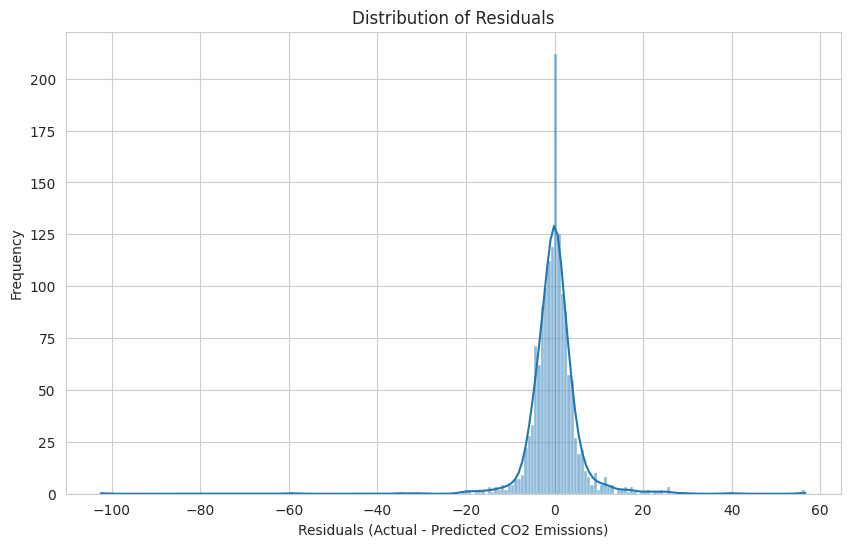

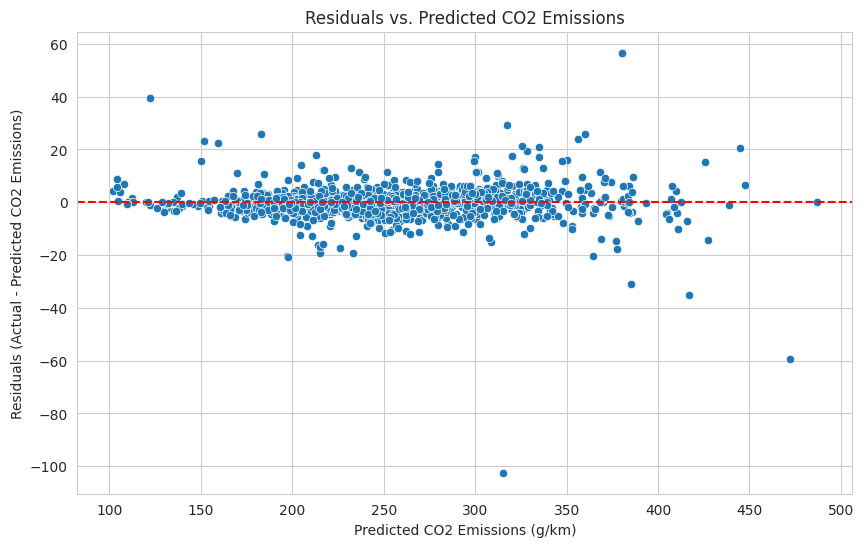

In [87]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted CO2 Emissions)')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted CO2 Emissions')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals (Actual - Predicted CO2 Emissions)')
plt.show()

#### Interpretation of Residual Plots:

* **Histogram of Residuals:** The histogram of the residuals appears to be roughly centered around zero and resembles a normal distribution. This is a good indication that the linear regression assumptions are reasonably met and that the model's errors are randomly distributed.
* **Residuals vs. Predicted Values Plot:** The scatter plot of residuals against predicted values shows no clear pattern or trend. The residuals are scattered randomly around the horizontal line at zero. This suggests that the model's errors are consistent across the range of predicted CO₂ emissions and that there is no systematic over- or under-prediction for certain emission levels.

These residual plots further support the findings from the performance metrics (MSE, RMSE, R²) that the linear regression model is a good fit for this dataset and provides reliable estimates of CO₂ emissions.

***
***

#### **10. Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how such insights could support emission reduction efforts.**

#### **Factors Most Strongly Influencing CO₂ Emissions:**

From both the initial data exploration (correlation analysis and visualizations) and the linear regression model, the factors that most strongly influence CO₂ emissions are:

* **Fuel Consumption:** All fuel consumption metrics (City, Highway, and Combined L/100 km) show very strong positive correlations with CO₂ emissions. The linear regression model also assigns significant weight to these features, indicating that higher fuel consumption directly leads to higher CO₂ emissions.
* **Engine Size and Cylinders:** Engine size and the number of cylinders also have strong positive correlations with CO₂ emissions. Larger engines and more cylinders generally consume more fuel and thus produce more CO₂. The model's coefficients reflect this positive relationship.
* **Fuel Type:** The type of fuel used has a significant impact on CO₂ emissions. Our analysis of categorical features and the model coefficients show notable differences in emissions across different fuel types (e.g., Gasoline, Premium Gasoline, Ethanol). Certain fuel types are associated with inherently lower or higher CO₂ outputs per unit of fuel consumed.
* **Vehicle Class, Make, and Model:** While 'Make' and 'Model' are very granular, the analysis showed significant variations in average CO₂ emissions across different makes and models, and more broadly across different vehicle classes. This indicates that the overall design, weight, and intended use of a vehicle class, as well as specific engineering choices by manufacturers, collectively influence emissions.

**How These Insights Can Support Emission Reduction Efforts:**

* **Targeted Design and Engineering:** Automotive manufacturers can focus on optimizing engine size, cylinder configuration, and fuel injection systems to improve fuel efficiency and reduce emissions, particularly in vehicle classes that show higher emission levels.
* **Promoting Fuel-Efficient Vehicles:** Policies and consumer awareness campaigns can emphasize the strong link between fuel consumption and CO₂ emissions, encouraging the adoption of more fuel-efficient vehicles across all categories.
* **Supporting Alternative Fuel Adoption:** The analysis highlights the difference in emissions across fuel types. Promoting the development and adoption of lower-emission fuel types (like Ethanol, as seen in the outliers analysis) can be a key strategy.
* **Informing Regulatory Standards:** The identified influential factors can inform the development of stricter emission standards for vehicles, focusing on the characteristics that have the biggest impact.
* **Consumer Information:** Providing clear information to consumers about how factors like engine size, fuel type, and vehicle class influence CO₂ emissions can empower them to make more environmentally conscious purchasing decisions.
* **Identifying and Investigating Outliers:** Examining vehicles with unusually high or low emissions for their class/fuel type can reveal innovative technologies or design flaws that could inform future emission reduction strategies or highlight areas needing further investigation.

In conclusion, focusing on reducing fuel consumption through advancements in engine technology, promoting efficient vehicle designs, and supporting the use of lower-emission fuel types are key areas for the Global Automotive Council and manufacturers to prioritize in their efforts to reduce vehicle CO₂ emissions.